In [1]:
import pandas as pd
import folium
import ast

In [2]:
df = pd.read_csv('data/details_data_raw.csv', index_col=0)

In [3]:
df['displayName'] = df['displayName'].apply(lambda s: ast.literal_eval(s)['text'] if type(s)==str else s)
df['location'] = df['location'].apply(lambda s: ast.literal_eval(s) if type(s)==str else s)
df['formattedAddress'] = df['formattedAddress'].apply(lambda s: s.removesuffix(' Mérida, Yuc., Mexico'))

In [4]:
df.dropna(subset='userRatingCount', inplace=True)
df.drop(df[df['userRatingCount'] <= 25].index, inplace=True)
df.reset_index(inplace=True)

In [8]:
coffees_pos= [(pos['latitude'], pos['longitude']) for pos in df.iloc[df.index]['location']]
len(coffees_pos)

322


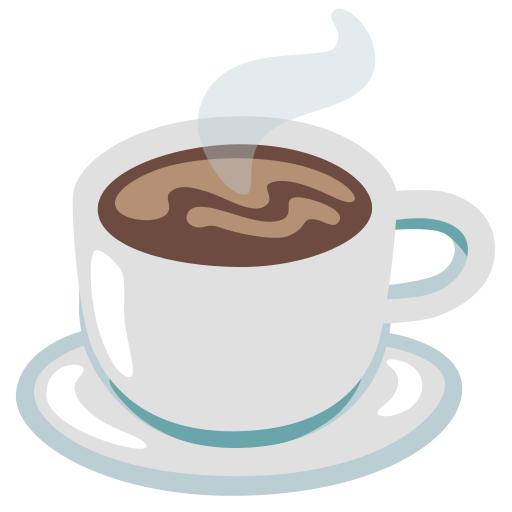

In [6]:
m = folium.Map(location=(20.992983019751655, -89.63901255210942), zoom_start=12, min_zoom=12)

icon = folium.CustomIcon(
    icon_image='data/resources/coffee_emoji.png',
    icon_size=(22,22)
)

i = 0

for pos in coffees_pos:
    html = f'''
                <div style="font-family: Arial, sans-serif; padding: 5px; border-radius: 5px; background-color: #FDF5E6; max-width: 250px;">
                <h3 style="color: #8c564b; margin-top: 0; margin-bottom: 5px; border-bottom: 2px solid #8c564b; padding-bottom: 3px;">
                    <center>{df['displayName'].iloc[i]}</center>
                </h3>
                <p style="margin: 3px 0; font-size: 1.1em;">
                    ⭐ <b>Rating:</b> <span style="font-weight: bold;">{df['rating'].iloc[i]}</span>
                </p>
                <p style="margin: 3px 0; font-size: 1.1em;">
                    📝 <b>Reviews:</b> {df['userRatingCount'].iloc[i]}
                </p>
                
                </p>
                <p style="margin: 3px 0; font-size: 1.1em;">
                    🔗 <a href={df['websiteUri'].iloc[i]}>Website / Social Media </a>
                </p>
                
                <hr style="border-top: 1px solid #ccc; margin: 5px 0;">
                <p style="margin: 3px 0; font-size: 0.9em; color: #555;">
                    🏠 <b>Address:</b> {df['formattedAddress'].iloc[i]}
                </p>
                </div>
    '''
    
    folium.Marker(
        location= [pos[0], pos[1]],
        icon=icon,
        popup=folium.Popup(html=html, max_width=1000)
    ).add_to(m)
    i+=1

m

In [7]:
m.save("docs/coffee-interactive-map.html")